# Analysis of Airbnb listings in London (Work-in-progress)

This notebook will take a look at Airbnb listings in London. I spent three exciting years here while completing my undergrad at the London School of Economics. London holds many fond memories for me!

We will focus on visualisations, using some new techniques of data & analysis that I've learnt on the job. First, we shall perform discovery and analysis on jupyter. Next, we deploy this in a dashboard using Bokeh!

We also aspire to make this into a decision-support tool. Therefore, we shall attempt to provide insights for both tourists as well as Airbnb itself. To do:
- illegal outlets
- growth rates
- professionalisation / monopolisation of listings (hosts have more than 1 listing)
- price of multihosts vs single hosts
- associated texts for multi vs single
- renting out of entire property?
- rates per neighbourhood
- rates per review
- metric for best place (w-ave of rates, reviews, vicinity to landmarks)
- safety?
- what affects review scores?
- different scores by different host types?
- bookings seasons: availability and price rate by date? price by neighbourhood? 

I've always enjoyed visualising data, and building things that users can interact with. Hope you find this useful!

Acknowledgements:
- https://www.kaggle.com/erikbruin/airbnb-the-amsterdam-story-with-interactive-maps
- https://github.com/rweng18/bokeh_map

Data source: http://insideairbnb.com/london/

Relevant articles:
- https://qz.com/876984/airbnb-is-gradually-losing-one-of-its-biggest-advantages-over-hotels/
- https://www.wired.co.uk/article/airbnb-growth-london-housing-data-insideairbnb

## 1) Import packages and data

In [32]:
import pandas as pd
import os
import gzip #to unzip .gzip files # https://stackoverflow.com/a/50115679
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) #set full rows

In [3]:
this_cwd = os.getcwd()
raw_data_folder = r"/DATA/"
raw_data_path = this_cwd  + raw_data_folder
for datafile in os.listdir(raw_data_path):
    print(datafile)

calendar.csv.gz
listings.csv
listings.csv.gz
neighbourhoods.csv
neighbourhoods.geojson
reviews.csv
reviews.csv.gz


Descriptions of data (from https://www.kaggle.com/erikbruin/airbnb-the-amsterdam-story-with-interactive-maps)

- *calendar.csv.gz*: The calendar has 365 records for each listing. It specifies the whether the listing is available on a particular day (365 days ahead), and the price on that day.
- *listings.csv*: A listing is basically an advertisement. This file holds the most useful variables that can be used visualizations.
- *listings.csv.gz*: This file holds the same variables as the listing file plus 80 additional variables.
- *neighbourhoods.csx*: Simple file with the names of the neighbouhoods
- *reviews.csv*: This is a simple file that can be used to count the number of reviews by listing (for a specific period).
- *reviews.csv.gz*: This file holds the full details of all reviews, and can also be used for instance for text mining.
- *neighbourhoods.geojson*: This is the shape file that can be used in conjunction with interactive maps (such as Leaflet for R of the Python folium package).

In [4]:
temp1 = pd.read_csv(raw_data_path + '/listings.csv')
temp1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,2,188,2020-01-24,1.56,2,332
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,20,2019-11-25,0.17,2,356
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,88,2019-09-23,0.71,1,185
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.39,15,230
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


In [5]:
df_listings = pd.read_csv(raw_data_path + "listings.csv")
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,2,188,2020-01-24,1.56,2,332
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,20,2019-11-25,0.17,2,356
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,88,2019-09-23,0.71,1,185
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.39,15,230
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


In [6]:
df_listings.shape

(87571, 16)

In [7]:
with gzip.open(raw_data_path + 'listings.csv.gz') as f:

    df_listings_details = pd.read_csv(f)   

D:\PYTHON_ENVIRONMENTS\AIRBNB\envs_airbnb\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df_listings_details.head(10) 

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200216042433,2020-02-16,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,NaN,NaN,https://a0.muscache.com/im/pictures/1d720898-c...,NaN,43039,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Brixton,Lambeth,NaN,London,NaN,SW9 8DG,London,"London, United Kingdom",GB,United Kingdom,51.46225,-0.11732,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,$88.00,$645.00,"$2,350.00",$400.00,$30.00,2,$20.00,2,180,2,2,180,180,2.0,180.0,5 days ago,t,26,42,72,332,2020-02-16,188,5,2010-03-21,2020-01-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.56
1,13913,https://www.airbnb.com/rooms/13913,20200216042433,2020-02-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,63%,86%,f,htt

In [9]:
df_listings_details.shape

(87571, 106)

## 2) Exploratory analysis

### 2.X Join with listing_details, to enrich our data

In [10]:
df_listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
df_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
df_listings_details.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


Based on reference notebook, as well as inspecting the full listings sheet, we can consider bringing these columns in to our main listings sheet.

In [13]:
cols_to_pull = ["id","property_type", "accommodates", "first_review", "review_scores_value", 
                "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", 
                "review_scores_communication", "review_scores_checkin", "review_scores_rating", 
                "maximum_nights", "listing_url", 
                "host_is_superhost", "host_about", "host_response_time", "host_response_rate", 
                "street", "price", "weekly_price", "monthly_price", "market",
                "host_identity_verified","neighbourhood_cleansed", "bathrooms", "bedrooms", "beds", "bed_type",
                "experiences_offered","notes","neighborhood_overview", "amenities", "cleaning_fee",
                "cancellation_policy",
               ]

df_listings = pd.merge(df_listings, df_listings_details[cols_to_pull], left_on='id', right_on='id', how='left')
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87571 entries, 0 to 87570
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              87571 non-null  int64  
 1   name                            87546 non-null  object 
 2   host_id                         87571 non-null  int64  
 3   host_name                       87557 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   87571 non-null  object 
 6   latitude                        87571 non-null  float64
 7   longitude                       87571 non-null  float64
 8   room_type                       87571 non-null  object 
 9   price_x                         87571 non-null  int64  
 10  minimum_nights                  87571 non-null  int64  
 11  number_of_reviews               87571 non-null  int64  
 12  last_review                     

In [14]:
del df_listings_details

### 2.X Missing values and duplicate columns

In [15]:
df_listings.isnull().sum()

id                                    0
name                                 25
host_id                               0
host_name                            14
neighbourhood_group               87571
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price_x                               0
minimum_nights                        0
number_of_reviews                     0
last_review                       20651
reviews_per_month                 20651
calculated_host_listings_count        0
availability_365                      0
property_type                         0
accommodates                          0
first_review                      20651
review_scores_value               22407
review_scores_cleanliness         22349
review_scores_location            22407
review_scores_accuracy            22360
review_scores_communication       22354
review_scores_checkin             22408


From the above, weekly_price and monthly_price are mainly missing. We can drop these. We will also drop neighbourhood_group because it seems to be entirely missing.

In [16]:
df_listings.drop(['weekly_price','monthly_price','neighbourhood_group'],axis=1,inplace=True)

In [17]:
df_listings[df_listings["neighbourhood"]!=df_listings["neighbourhood_cleansed"]]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,price_y,market,host_identity_verified,neighbourhood_cleansed,bathrooms,bedrooms,beds,bed_type,experiences_offered,notes,neighborhood_overview,amenities,cleaning_fee,cancellation_policy


We also see that "neighbourhood" is the same as "neighbourhood_cleansed". Let's drop neighbourhood_cleansed.

In [18]:
df_listings.drop(['neighbourhood_cleansed'],axis=1,inplace=True)

In [19]:
df_listings[["price_x","price_y"]]

,price_x,price_y
0,88,$88.00
1,65,$65.00
2,100,$100.00
3,300,$300.00
4,150,$150.00
...,...,...
87566,180,$180.00
87567,400,$400.00
87568,30,$30.00
87569,400,$400.00


In [23]:
df_listings["price_y"] = df_listings["price_y"].str.replace(",","")
df_listings["price_y"] = df_listings["price_y"].str.replace("$","")
df_listings["price_y"] = df_listings["price_y"].astype(float)

In [24]:
df_listings[df_listings["price_x"]!=df_listings["price_y"]]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,price_y,market,host_identity_verified,bathrooms,bedrooms,beds,bed_type,experiences_offered,notes,neighborhood_overview,amenities,cleaning_fee,cancellation_policy


From the above, we can conclude the that price in the listing details list is weekly to the price in the trimmed listings list. We can also assume cleaning fees is over and above price.

In [25]:
df_listings.drop(["price_y"],axis=1,inplace=True)

In [26]:
df_listings = df_listings.rename(columns={"price_x":"price_per_night"})

In [27]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87571 entries, 0 to 87570
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              87571 non-null  int64  
 1   name                            87546 non-null  object 
 2   host_id                         87571 non-null  int64  
 3   host_name                       87557 non-null  object 
 4   neighbourhood                   87571 non-null  object 
 5   latitude                        87571 non-null  float64
 6   longitude                       87571 non-null  float64
 7   room_type                       87571 non-null  object 
 8   price_per_night                 87571 non-null  int64  
 9   minimum_nights                  87571 non-null  int64  
 10  number_of_reviews               87571 non-null  int64  
 11  last_review                     66920 non-null  object 
 12  reviews_per_month               

### 2.X Exploratory analysis
Understand what the data looks like, how it is distributed, quality assessment, visualise on Leaflet map via folium

In [34]:
df_listings.head(42)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_per_night,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,market,host_identity_verified,bathrooms,bedrooms,beds,bed_type,experiences_offered,notes,neighborhood_overview,amenities,cleaning_fee,cancellation_policy
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,Lambeth,51.46225,-0.11732,Entire home/apt,88,2,188,2020-01-24,1.56,2,332,Apartment,4,2010-03-21,9.0,9.0,9.0,9.0,10.0,10.0,92.0,180,https://www.airbnb.com/rooms/11551,t,"Hello, I'm a friendly Italian man with a very ...",within an hour,100%,"London, United Kingdom",London,t,1.0,1.0,1.0,Real Bed,family,No Smoking (very strict) Check-in time is afte...,Not even 10 minutes by metro from Victoria Sta...,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$30.00,strict_14_with_grace_period
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56802,-0.11121,Private room,65,1,20,2019-11-25,0.17,2,356,Apartment,2,2010-08-18,9.0,10.0,9.0,10.0,10.0,10.0,97.0,29,https://www.airbnb.com/rooms/13913,f,I am a Multi-Media Visual Artist and Creative ...,within a few hours,63%,"Islington, Greater London, United Kingdom",London,t,1.0,1.0,0.0,Real Bed,business,For art lovers I can give guest my Tate Member...,Finsbury Park is a friendly melting pot commun...,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$15.00,moderate
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,88,2019-09-23,0.71,1,185,Apartment,2,2009-12-21,9.0,10.0,10.0,10.0,10.0,10.0,96.0,50,https://www.airbnb.com/rooms/15400,f,"English, grandmother, I have travelled quite ...",within a day,57%,"London, United Kingdom",London,t,1.0,1.0,1.0,Real Bed,romantic,The building next door is in the process of be...,It is Chelsea.,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,strict_14_with_grace_period
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.39,15,230,Apartment,6,2011-03-21,9.0,9.0,10.0,10.0,9.0,9.0,94.0,365,https://www.airbnb.com/rooms/17402,f,We are Liz and Jack. We manage a number of ho...,within an hour,100%,"London, Fitzrovia, United Kingdom",London,t,2.0,3.0,3.0,Real Bed,none,This property has new flooring throughout. Gue...,"Location, location, location! You won't find b...","{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$70.00,strict_14_with_grace_period
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364,Bed and breakfast,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,https://www.airbnb.com/rooms/17506,f,"Named best B&B by The Times. Easy going hosts,...",within an hour,100%,"London, United Kingdom",London,f,1.0,1.0,1.0,Real Bed,business,Ask us and we'll answer.,Fulham is 'villagey' and residential – a real ...,"{TV,Internet,Wifi,""Air conditioning"",Breakfast...",NaN,strict_14_with_grace_period
5,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,34,2019-09-15,0.71,1,91,Apartment,4,2016-03-05,9.0,10.0,9.0,10.0,10.0,9.0,93.0,1125,https://www.airbnb.com/rooms/25023,t,"Hi, I'm a sociologist/anthropologist, NLP exec...",within a few hours,100%,"Wimbledon, London, United Kingdom",London,f,1.0,2.0,2.0,Real Bed,none,Non-smokers only. No pets.,This is a leafy residential area with excellen...,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",$50.00,moderate
6,25123,Clean big Room in London (Room 1),103583,Grace,Barnet,51.57224,-0.

**Neighbourhood**

Which are the most popular neighbourhoods?

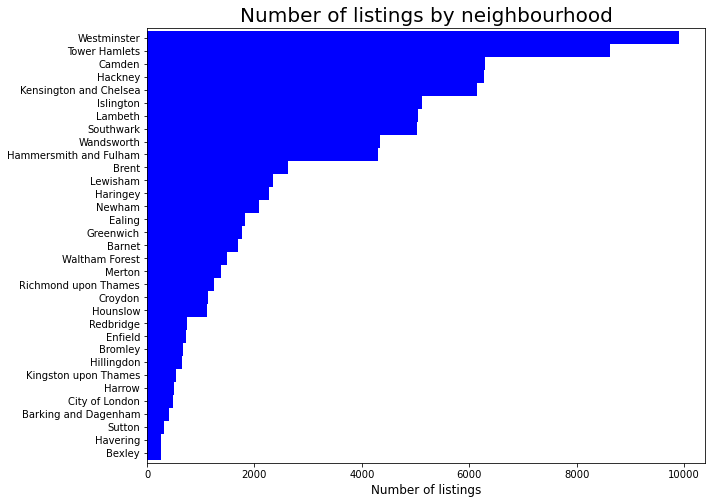

In [33]:
feq=df_listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()